In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Load test image
img = cv2.imread('cropped_data/cropped_images_recon/test/92-5091359-180518-cirrhosis&splenomegaly&rightkidneycyst&leftkidneystone_6_5.jpg')
height, width, channel = img.shape

In [3]:
# define rotation function
def warpAff2(image, matrix, width, height):
    dst = np.zeros((height, width, 3), dtype=np.uint8)
    oldh, oldw = image.shape[:2]
    for u in range(width):
        for v in range(height):
            x = u*matrix[0,0]+v*matrix[0,1]+matrix[0,2]
            y = u*matrix[1,0]+v*matrix[1,1]+matrix[1,2]
            intx, inty = int(x), int(y)
            if 0 < intx < oldw and 0 < inty < oldh:
                pix = image[inty, intx]
                dst[v, u] = pix
    return dst

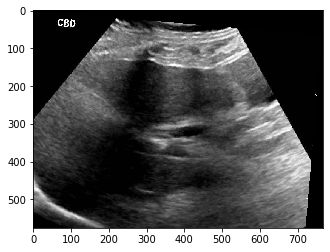

In [4]:
# Test rotation
angle = np.random.uniform(-0.2,0.2)

rotation_ratio = np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])

rotated_img = warpAff2(img, rotation_ratio, width, height)
plt.imshow(rotated_img)

In [6]:
min_val = np.array(-0.5)

In [7]:
min_val

array(-0.5)

[0.01508976 0.11382503]


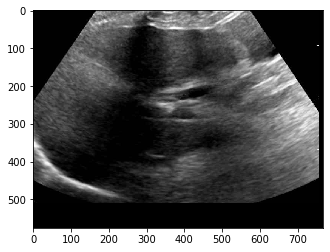

In [173]:
# Test traslation
tran_rand = np.random.uniform(-0.12, 0.12, 2)
print(tran_rand)

translation_ratio = np.array([
        [1, 0, tran_rand[0]*width],
        [0, 1, tran_rand[1]*height],
        [0, 0, 1]
    ])

translation_img = warpAff2(img, translation_ratio, width, height)
plt.imshow(translation_img)

[0.96417036 1.03005866]


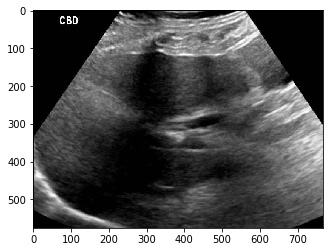

In [148]:
# Test scaling
scale_rand = np.random.uniform(0.9, 1.2, 2)
print(scale_rand)

scale_ratio = np.array([
        [min_scale[0], 0, 0],
        [0, min_scale[0], 0],
        [0, 0, 1]
    ])

scale_img = warpAff2(img, scale_ratio, width, height)
plt.imshow(scale_img)

In [174]:
def _clip(image):
    """
    Clip and convert an image to np.uint8.

    Args
        image: Image to clip.
    """
    return np.clip(image, 0, 255).astype(np.uint8)

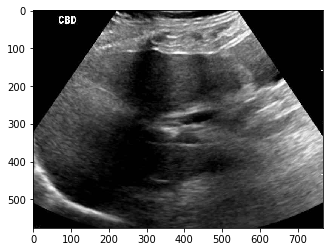

In [177]:
plt.imshow(img)

0.4831928486435093


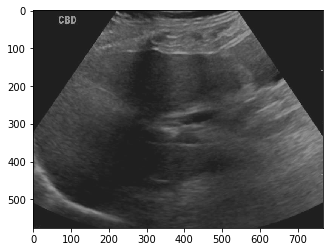

In [228]:
# Test contrast
contrast_rand = np.random.uniform(0.2, 1.8)
print(contrast_rand)

def adjust_contrast(image, factor):
    """ Adjust contrast of an image.

    Args
        image: Image to adjust.
        factor: A factor for adjusting contrast.
    """
    mean = image.mean(axis=0).mean(axis=0)
    return _clip((image - mean) * factor + mean)

contrast_img = adjust_contrast(img, contrast_rand)
plt.imshow(contrast_img)

0.25439074573613235


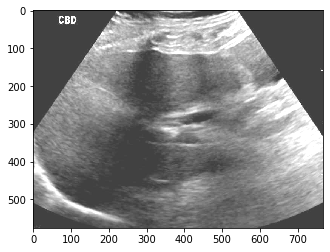

In [243]:
# Test brightness

bright_rand = np.random.uniform(-0.3, 0.3)
print(bright_rand)

def adjust_brightness(image, delta):
    """ Adjust brightness of an image

    Args
        image: Image to adjust.
        delta: Brightness offset between -1 and 1 added to the pixel values.
    """
    return _clip(image + delta * 255)

bright_img = adjust_brightness(img, bright_rand)
plt.imshow(bright_img)

In [ ]:
# Test hue range



In [ ]:
# Saturation range